## Analysis of an E-commerce Dataset Part 2

The goal of the second analysis task is to train linear regression models to predict users' ratings towards items. This involves a standard Data Science workflow: exploring data, building models, making predictions, and evaluating results. In this task, we will explore the impacts of feature selections and different sizes of training/testing data on the model performance. We will use another cleaned combined e-commerce sub-dataset that **is different from** the one in “Analysis of an E-commerce Dataset” task 1.

### Import Cleaned E-commerce Dataset
The csv file named 'cleaned_ecommerce_dataset.csv' is provided. You may need to use the Pandas method, i.e., `read_csv`, for reading it. After that, please print out its total length.

In [82]:
#asset importing
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
import matplotlib.pylab as plt
%matplotlib inline
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn import linear_model
from sklearn.metrics import mean_squared_error
dataset = pd.read_csv("cleaned_ecommerce_dataset.csv")
dataset

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,Not always McCrap,McDonald's,4.0,3.0,M,Restaurants & Gourmet,41,30.74,4
1,4081,72000,I dropped the chalupa even before he told me to,Taco Bell,1.0,4.0,M,Restaurants & Gourmet,74,108.30,4
2,4081,72000,The Wonderful World of Wendy,Wendy's,5.0,4.0,M,Restaurants & Gourmet,84,69.00,4
3,4081,100399,They actually did it,"South Park: Bigger, Longer & Uncut",5.0,3.0,M,Movies,68,143.11,4
4,4081,100399,Hey! Gimme some pie!,American Pie,3.0,3.0,M,Movies,6,117.89,4
...,...,...,...,...,...,...,...,...,...,...,...
2680,2445,22000,Great movie!,Austin Powers: The Spy Who Shagged Me,5.0,3.0,M,Movies,9,111.00,5
2681,2445,30700,Good food!,Outback Steakhouse,5.0,3.0,M,Restaurants & Gourmet,50,25.00,5
2682,2445,61500,Great movie!,Fight Club,5.0,3.0,M,Movies,26,97.53,5
2683,2445,100500,Awesome Game.,The Sims 2: Open for Business for Windows,5.0,4.0,M,Games,79,27.00,5


### Explore the Dataset

* Use the methods, i.e., `head()` and `info()`, to have a rough picture about the data, e.g., how many columns, and the data types of each column.
* As our goal is to predict ratings given other columns, please get the correlations between helpfulness/gender/category/review and rating by using the `corr()` method.
* To get the correlations between different features, you may need to first convert the categorical features (i.e., gender, category and review) into numerial values. For doing this, you may need to import `OrdinalEncoder` from `sklearn.preprocessing` (refer to the useful exmaples [here](https://pbpython.com/categorical-encoding.html))
* Please provide ___necessary explanations/analysis___ on the correlations, and figure out which are the ___most___ and ___least___ corrleated features regarding rating. Try to ___discuss___ how the correlation will affect the final prediction results, if we use these features to train a regression model for rating prediction. In what follows, we will conduct experiments to verify your hypothesis.

In [58]:
#Exploring data types in our data frame
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2685 entries, 0 to 2684
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   userId       2685 non-null   int64  
 1   timestamp    2685 non-null   int64  
 2   review       2685 non-null   object 
 3   item         2685 non-null   object 
 4   rating       2685 non-null   float64
 5   helpfulness  2685 non-null   float64
 6   gender       2685 non-null   object 
 7   category     2685 non-null   object 
 8   item_id      2685 non-null   int64  
 9   item_price   2685 non-null   float64
 10  user_city    2685 non-null   int64  
dtypes: float64(3), int64(4), object(4)
memory usage: 230.9+ KB


In [86]:
#encoding our data for analysis
#initializes an instance of the OrdinalEncoder
ord_enc = OrdinalEncoder()
# the fit_transform method of the ord_enc object to convert the gender column of the dataset into numerical values.
# The transformed numerical values are then assigned back in the dataset.
dataset["gender"] = ord_enc.fit_transform(dataset[["gender"]])
dataset["category"] = ord_enc.fit_transform(dataset[["category"]])
dataset["review"] = ord_enc.fit_transform(dataset[["review"]])
dataset

,userId,timestamp,review,item,rating,helpfulness,gender,category,item_id,item_price,user_city
0,4081,71900,1618.0,McDonald's,4.0,3.0,1.0,8.0,41,30.74,4
1,4081,72000,1125.0,Taco Bell,1.0,4.0,1.0,8.0,74,108.30,4
2,4081,72000,2185.0,Wendy's,5.0,4.0,1.0,8.0,84,69.00,4
3,4081,100399,2243.0,"South Park: Bigger, Longer & Uncut",5.0,3.0,1.0,5.0,68,143.11,4
4,4081,100399,1033.0,American Pie,3.0,3.0,1.0,5.0,6,117.89,4
...,...,...,...,...,...,...,...,...,...,...,...
2680,2445,22000,968.0,Austin Powers: The Spy Who Shagged Me,5.0,3.0,1.0,5.0,9,111.00,5
2681,2445,30700,920.0,Outback Steakhouse,5.0,3.0,1.0,8.0,50,25.00,5
2682,2445,61500,968.0,Fight Club,5.0,3.0,1.0,5.0,26,97.53,5
2683,2445,100500,372.0,The Sims 2: Open for Business for Windows,5.0,4.0,1.0,1.0,79,27.00,5


In [87]:
#correlations between helpfulness/gender/category/review and rating
dataset.corr()

C:\Users\Benymean\AppData\Local\Temp\ipykernel_6256\778193684.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataset.corr()


,userId,timestamp,review,rating,helpfulness,gender,category,item_id,item_price,user_city
userId,1.000000,-0.069176,0.007139,0.032506,-0.166136,-0.058324,-0.041362,-0.005549,0.024576,-0.030031
timestamp,-0.069176,1.000000,0.007029,0.000369,0.014179,-0.003367,0.015009,-0.004452,0.010979,-0.014934
review,0.007139,0.007029,1.000000,-0.036118,-0.028259,-0.037884,0.001970,0.163544,-0.041421,0.045626
rating,0.032506,0.000369,-0.036118,1.000000,-0.007523,-0.034337,-0.163158,0.042890,0.027374,-0.028825
helpfulness,-0.166136,0.014179,-0.028259,-0.007523,1.000000,0.075947,-0.013408,-0.019882,0.004112,0.012086
gender,-0.058324,-0.003367,-0.037884,-0.034337,0.075947,1.000000,0.022549,0.002370,-0.040596,-0.065638
category,-0.041362,0.015009,0.001970,-0.163158,-0.013408,0.022549,1.000000,-0.045268,-0.115571,0.008017
item_id,-0.005549,-0.004452,0.163544,0.042890,-0.019882,0.002370,-0.045268,1.000000,-0.054450,-0.005576
item_price,0.024576,0.010979,-0.041421,0.027374,0.004112,-0.040596,-0.115571,-0.054450,1.000000,-0.023427
user_city,-0.030031,-0.014934,0.045626,-0.028825,0.012086,-0.065638,0.008017,-0.005576,-0.023427,1.000000


# Rating's Correlations
Here are the correlations between the features and the 'rating' column:
- **Helpfulness:** −0.0075
- **Gender:** -0.0343
- **Category:** -0.1632
- **Review:** −0.0361

## Hypothesis:
If we were to use these features to train a regression model:

The **most correlated feature** with 'rating' is **Category** with a correlation coefficient of 
  **−0.1632** It's a negative correlation, indicating that as the category value increases, the rating tends to decrease (or vice  versa). This suggests that the category of an item might have some influence on its rating.

The **least correlated feature** with 'rating' is **Helpfulness** with a correlation coefficient of 
  − 0.0075 This indicates that the helpfulness of a review has little to no linear relationship with the rating.


### Split Training and Testing Data
* Machine learning models are trained to help make predictions for the future. Normally, we need to randomly split the dataset into training and testing sets, where we use the training set to train the model, and then leverage the well-trained model to make predictions on the testing set.
* To further investigate whether the size of the training/testing data affects the model performance, please random split the data into training and testing sets with different sizes:
    * Case 1: training data containing 10% of the entire data;
    * Case 2: training data containing 90% of the entire data.
* Print the shape of training and testing sets in the two cases.

## Case 2:

In [88]:
#spliting data set into test data set and train data set where we train the data on 90% of our data and test on 10%
from sklearn.model_selection import train_test_split
train_2 , test_2 = train_test_split(dataset, test_size = 0.1, random_state=42 )
print(train_2.shape)
print(test_2.shape)

(2416, 11)
(269, 11)


## Case 1:

In [89]:
#spliting data set into test data set and train data set where we train the data on 10% of our data and test on 90%
from sklearn.model_selection import train_test_split
train_1 , test_1 = train_test_split(dataset, test_size = 0.9, random_state=42 )
print(train_1.shape)
print(test_1.shape)

(268, 11)
(2417, 11)


### Train Linear Regression Models with Feature Selection under Cases 1 & 2
* When training a machine learning model for prediction, we may need to select the most important/correlated input features for more accurate results.
* To investigate whether feature selection affects the model performance, please select two most correlated features and two least correlated features regarding rating, respectively.
* Train four linear regression models by following the conditions:
    - (model-a) using the training/testing data in case 1 with two most correlated input features
    - (model-b) using the training/testing data in case 1 with two least correlated input features
    - (model-c) using the training/testing data in case 2 with two most correlated input features
    - (model-d) using the training/testing data in case 2 with two least correlated input features
* By doing this, we can verify the impacts of the size of traing/testing data on the model performance via comparing model-a and model-c (or model-b and model-d); meanwhile the impacts of feature selection can be validated via comparing model-a and model-b (or model-c and model-d).    

### Evaluate Models
* Evaluate the performance of the four models with two metrics, including MSE and Root MSE
* Print the results of the four models regarding the two metrics

# Model A

In [183]:
# creating an instance of the LinearRegression class from the linear_model
reg_a = linear_model.LinearRegression()
# choosing "category" and "review" as the input features and "rating" as the target variable from the train_1 DataFrame
x_train_1 = train_1[["category","review"]]
y_train_1 = train_1[["rating"]]
#selecting the same features of testing data and the same target variable from the test_1 DataFrame
x_test_1= test_1[["category","review"]]
y_test_1= test_1[["rating"]]
#choosing "category" and "review" as the input features and "rating" as the target variable.
reg_a.fit(x_train_1,y_train_1)
# printing y = mx + c
print("y = x * ", reg_a.coef_, "+ ", reg_a.intercept_ )

y = x *  [[-1.31822118e-01  1.21438182e-05]] +  [4.35941313]


In [164]:

pred_a = reg_a.predict(x_test_1)
mse_a = mean_squared_error(y_test_1, pred_a)
rootmse_a = np.sqrt(mse_a)
print("mse =", mse_a)
print("root mse =",rootmse_a)


mse = 1.776581354691434
root mse = 1.3328845991650717


# Model B

In [165]:
reg_b = linear_model.LinearRegression()
x_train_1 = train_1[["helpfulness","gender"]]
y_train_1 = train_1[["rating"]]
x_test_1 = test_1[["helpfulness","gender"]]
y_test_1 = test_1[["rating"]]
reg_b.fit(x_train_1,y_train_1)
print("y = x * ", reg_b.coef_, "+ ", reg_b.intercept_ )

y = x *  [[-0.14651872 -0.43196508]] +  [4.48609049]


In [166]:
pred_b = reg_b.predict(x_test_1)
mse_b = mean_squared_error(y_test_1, pred_b)
rootmse_b = np.sqrt(mse_b)
print("mse =", mse_b)
print("root mse =",rootmse_b)

mse = 1.860535990321889
root mse = 1.3640146591301316


# Model C

In [167]:
reg_c = linear_model.LinearRegression()
x_train_2 = train_2[["category","review"]]
y_train_2 = train_2[["rating"]]
x_test_2= test_2[["category","review"]]
y_test_2= test_2[["rating"]]

reg_c.fit(x_train_2,y_train_2)
print("y = x * ", reg_c.coef_, "+ ", reg_c.intercept_ )

y = x *  [[-1.24834474e-01 -7.58022504e-05]] +  [4.42269892]


In [168]:
pred_c = reg_a.predict(x_test_2)
mse_c = mean_squared_error(y_test_2, pred_c)
rootmse_c = np.sqrt(mse_c)
print("mse =", mse_c)
print("root mse =",rootmse_c)

mse = 1.6700889324355508
root mse = 1.2923192068663032


# Model D

In [169]:
reg_d = linear_model.LinearRegression()
x_train_2 = train_2[["helpfulness","gender"]]
y_train_2 = train_2[["rating"]]
x_test_2 = test_2[["helpfulness","gender"]]
y_test_2 = test_2[["rating"]]
reg_d.fit(x_train_2,y_train_2)
print("y = x * ", reg_d.coef_, "+ ", reg_d.intercept_ )

y = x *  [[-0.01270512 -0.09973812]] +  [3.79772724]


In [174]:
pred_d = reg_d.predict(x_test_2)
mse_d = mean_squared_error(y_test_2, pred_d)
rootmse_d = np.sqrt(mse_d)
print("mse =", mse_d)
print("root mse =",rootmse_d)

mse = 1.7245375467700426
root mse = 1.3132164889194937


### Visualize, Compare and Analyze the Results
* Visulize the results, and perform ___insightful analysis___ on the obtained results. For better visualization, you may need to carefully set the scale for the y-axis.
* Normally, the model trained with most correlated features and more training data will get better results. Do you obtain the similar observations? If not, please ___explain the possible reasons___.

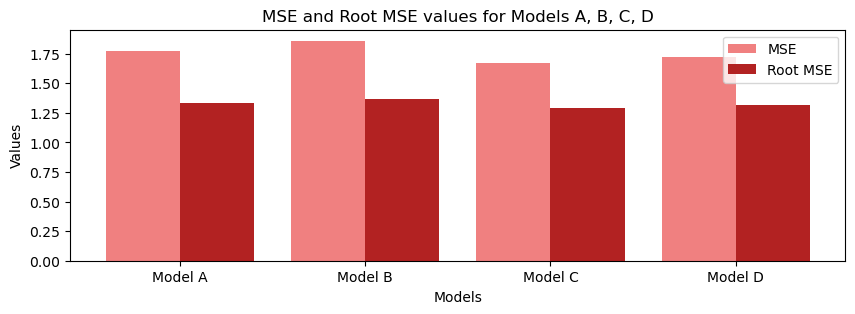

In [182]:
labels = ['Model A', 'Model B', 'Model C', 'Model D']
mse_values = [mse_a, mse_b, mse_c, mse_d]
rootmse_values = [rootmse_a, rootmse_b, rootmse_c, rootmse_d]
plt.figure(figsize=(10, 3))
positions = list(range(4))
plt.bar(positions, mse_values, width=0.4, label='MSE', color='lightcoral', align='center')
plt.bar([p + 0.4 for p in positions], rootmse_values, width=0.4, label='Root MSE', color='firebrick', align='center')
plt.xlabel('Models')
plt.ylabel('Values')
plt.title('MSE and Root MSE values for Models A, B, C, D')
plt.xticks([p + 0.2 for p in positions], labels)
plt.legend()


# Insights
- Model C, which is trained with 90% of the data and the most correlated features, performs the best with the lowest MSE and RMSE values. This observation means that more training data and selecting highly correlated features will lead to a better-performing model.
- Model B, trained with just 10% of the data and the least correlated features, has the highest error metrics
- Model A and Model D have comparable performances, but Model A performs slightly better. This indicates that the choice of features has more impact when the model is trained with less data.
- The difference in performance between Model A and Model D is less than the difference between Model C and Model D , suggesting that the amount of training data might be a more dominant factor in model performance 
